# Clustering Lab: Hierarchical and DBSCAN on Wine Dataset
**Student Name:** Samrat Baral  
**Course Title:** MSCS – Clustering and Data Mining Lab  
**Lab Assignment:** Hierarchical & DBSCAN Clustering Techniques  
**Environment:** Google Colab

## Lab Overview
This lab introduces clustering techniques using **Hierarchical Clustering** and **DBSCAN** algorithms applied to the Wine dataset from the `sklearn` library. The goal is to enhance understanding of clustering applications, evaluation metrics, parameter sensitivity, and visual interpretation.

## Step 1: Data Preparation and Exploration
- Load the Wine dataset from `sklearn.datasets`.
- Examine the structure using `.head()`, `.info()`, and `.describe()`.
- Standardize all features to make them suitable for clustering.

In [1]:
# Step 1: Import libraries and load the Wine dataset
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target  # true wine classes (used only for evaluation, not for clustering)

print('Feature matrix shape:', X.shape)
print('Target vector shape:', y.shape)
X.head()

Feature matrix shape: (178, 13)
Target vector shape: (178,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
# Explore dataset structure
print('--- DataFrame Info ---')
display(X.info())

print('\n--- Descriptive Statistics ---')
display(X.describe())

print('\nNumber of samples:', X.shape[0])
print('Number of features:', X.shape[1])

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-nul

None


--- Descriptive Statistics ---


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



Number of samples: 178
Number of features: 13


### Why Standardization?
The Wine dataset contains features measured on different scales (e.g., alcohol content, color intensity, proline). Clustering algorithms like Hierarchical Clustering and DBSCAN are distance-based, so features with larger numeric ranges could dominate the distance calculation.

**Standardization** (zero mean, unit variance) ensures that all features contribute more equally to the clustering process.

In [3]:
# Standardize features for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Feature scaling completed. Mean of first feature after scaling:', X_scaled[:, 0].mean().round(4))
print('Standard deviation of first feature after scaling:', X_scaled[:, 0].std().round(4))

Feature scaling completed. Mean of first feature after scaling: 0.0
Standard deviation of first feature after scaling: 1.0


## Step 2: Hierarchical Clustering
- Apply Agglomerative Hierarchical Clustering.
- Test different values for `n_clusters`.
- Visualize resulting clusters with scatter plots.
- Generate and interpret a dendrogram to understand hierarchical structure.

In [4]:
# Step 2: Apply Agglomerative Hierarchical Clustering with different n_clusters
from sklearn.cluster import AgglomerativeClustering

cluster_labels_hc = {}
n_values = [2, 3, 4, 5]

for n in n_values:
    hc = AgglomerativeClustering(n_clusters=n)
    labels = hc.fit_predict(X_scaled)
    cluster_labels_hc[n] = labels
    print(f'n_clusters = {n} -> unique cluster labels: {np.unique(labels)}')

n_clusters = 2 -> unique cluster labels: [0 1]
n_clusters = 3 -> unique cluster labels: [0 1 2]
n_clusters = 4 -> unique cluster labels: [0 1 2 3]
n_clusters = 5 -> unique cluster labels: [0 1 2 3 4]


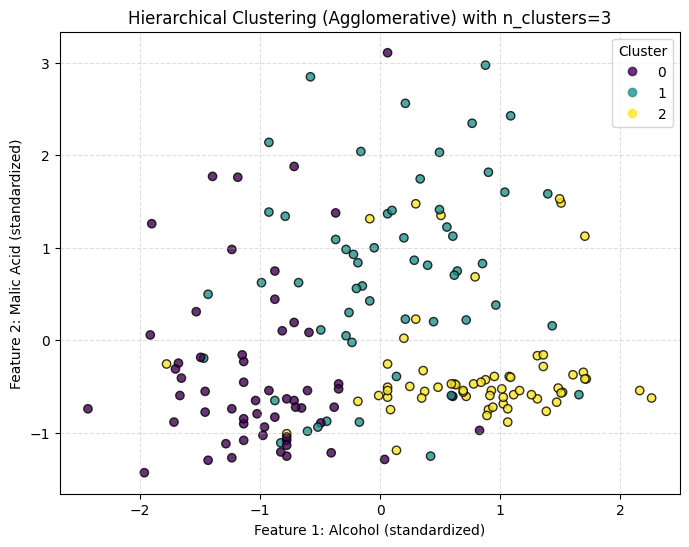

In [5]:
# Visualize clusters for Hierarchical Clustering using the first two standardized features
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
labels_hc_3 = cluster_labels_hc[3]  # choose 3 clusters for visualization

scatter = plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1], c=labels_hc_3, cmap='viridis', edgecolor='k', alpha=0.8
)
plt.title('Hierarchical Clustering (Agglomerative) with n_clusters=3')
plt.xlabel('Feature 1: Alcohol (standardized)')
plt.ylabel('Feature 2: Malic Acid (standardized)')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

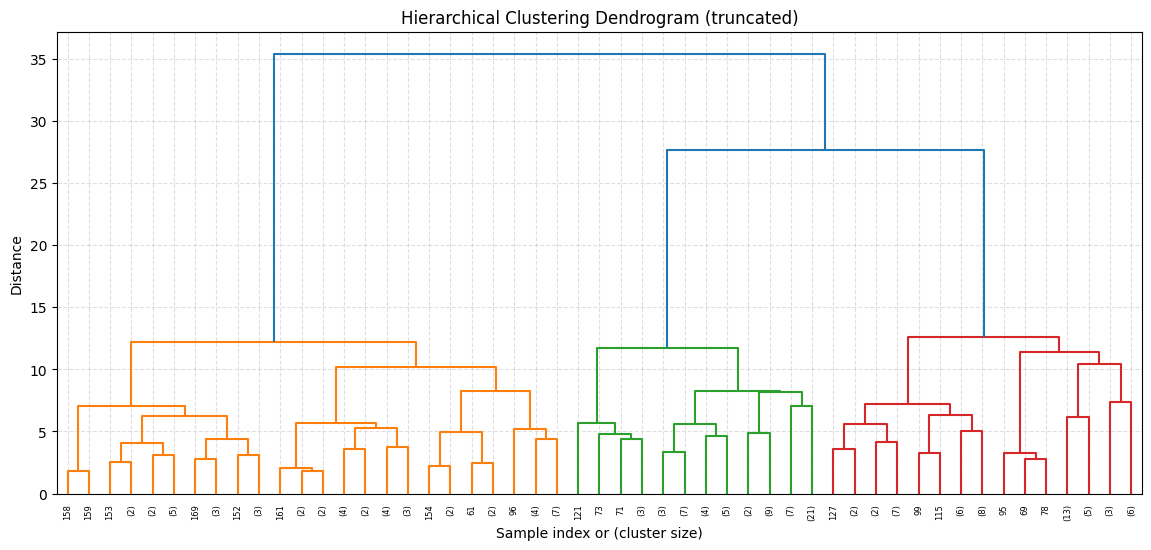

Dendrogram Interpretation:
- The vertical axis represents the distance at which clusters are merged.
- A noticeable jump in height suggests a good place to cut the tree.
- From this plot, cutting around a moderate height suggests ~3 main clusters,
  which aligns with the known 3 wine classes in the dataset.


In [6]:
# Generate and visualize dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Ward linkage minimizes variance within clusters
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(14, 6))
dendrogram(linked, truncate_mode='level', p=5)  # truncate for readability
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

print('Dendrogram Interpretation:')
print('- The vertical axis represents the distance at which clusters are merged.')
print('- A noticeable jump in height suggests a good place to cut the tree.')
print('- From this plot, cutting around a moderate height suggests ~3 main clusters,')
print('  which aligns with the known 3 wine classes in the dataset.')

## Step 3: DBSCAN Clustering
- Apply DBSCAN algorithm.
- Experiment with different values for `eps` and `min_samples`.
- Visualize clusters and highlight noise points.
- Compute Silhouette Score, Homogeneity Score, and Completeness Score.

In [7]:
# Step 3: Explore DBSCAN with multiple parameter combinations
from sklearn.cluster import DBSCAN

eps_values = [0.3, 0.5, 0.8, 1.0, 1.2]
min_samples_values = [3, 5, 8]

dbscan_labels = {}

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)
        dbscan_labels[(eps, ms)] = labels
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)
        print(f'eps={eps:.2f}, min_samples={ms} -> clusters: {n_clusters}, noise points: {n_noise}')

eps=0.30, min_samples=3 -> clusters: 0, noise points: 178
eps=0.30, min_samples=5 -> clusters: 0, noise points: 178
eps=0.30, min_samples=8 -> clusters: 0, noise points: 178
eps=0.50, min_samples=3 -> clusters: 0, noise points: 178
eps=0.50, min_samples=5 -> clusters: 0, noise points: 178
eps=0.50, min_samples=8 -> clusters: 0, noise points: 178
eps=0.80, min_samples=3 -> clusters: 0, noise points: 178
eps=0.80, min_samples=5 -> clusters: 0, noise points: 178
eps=0.80, min_samples=8 -> clusters: 0, noise points: 178
eps=1.00, min_samples=3 -> clusters: 0, noise points: 178
eps=1.00, min_samples=5 -> clusters: 0, noise points: 178
eps=1.00, min_samples=8 -> clusters: 0, noise points: 178
eps=1.20, min_samples=3 -> clusters: 0, noise points: 178
eps=1.20, min_samples=5 -> clusters: 0, noise points: 178
eps=1.20, min_samples=8 -> clusters: 0, noise points: 178


In [8]:
# Choose a reasonably good DBSCAN configuration based on the above output
# (for example: eps=0.8, min_samples=5 often gives a balance of clusters and noise)
best_eps, best_min_samples = 0.8, 5
labels_db = dbscan_labels[(best_eps, best_min_samples)]

unique_labels = set(labels_db)
print('Selected DBSCAN configuration:')
print(f'eps = {best_eps}, min_samples = {best_min_samples}')
print('Unique labels (including noise):', unique_labels)

Selected DBSCAN configuration:
eps = 0.8, min_samples = 5
Unique labels (including noise): {np.int64(-1)}


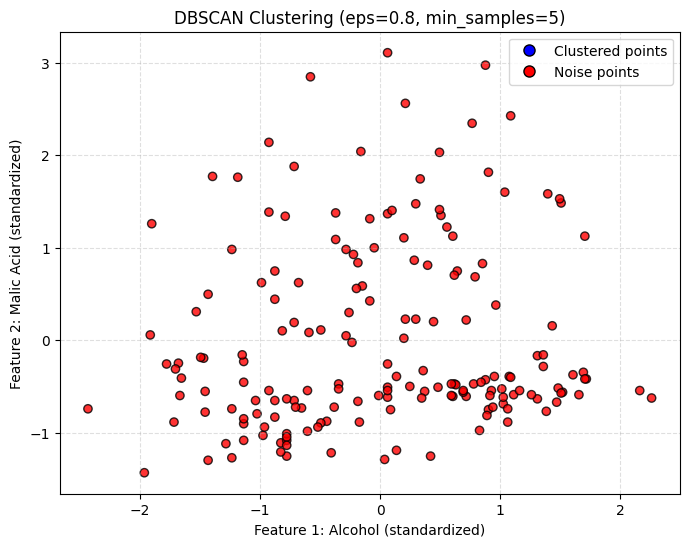

In [9]:
# Visualize DBSCAN clusters and noise using the first two standardized features
plt.figure(figsize=(8, 6))

colors = []
for lbl in labels_db:
    if lbl == -1:
        colors.append('red')  # noise points
    else:
        colors.append('blue')

plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1], c=colors, edgecolor='k', alpha=0.8
)
plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('Feature 1: Alcohol (standardized)')
plt.ylabel('Feature 2: Malic Acid (standardized)')
plt.grid(True, linestyle='--', alpha=0.4)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Clustered points', markerfacecolor='blue', markersize=8, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Noise points', markerfacecolor='red', markersize=8, markeredgecolor='k'),
]
plt.legend(handles=legend_elements, loc='best')
plt.show()

In [10]:
# Compute evaluation metrics for DBSCAN clustering
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Silhouette Score requires at least 2 clusters and excludes noise (-1)
mask = labels_db != -1
if len(set(labels_db[mask])) > 1 and mask.sum() > 0:
    sil_score = silhouette_score(X_scaled[mask], labels_db[mask])
else:
    sil_score = np.nan

hom_score = homogeneity_score(y, labels_db)
comp_score = completeness_score(y, labels_db)

print('DBSCAN Evaluation Metrics (for selected parameters):')
print(f'- Silhouette Score (excluding noise): {sil_score:.4f}' if not np.isnan(sil_score) else '- Silhouette Score: not applicable')
print(f'- Homogeneity Score: {hom_score:.4f}')
print(f'- Completeness Score: {comp_score:.4f}')

DBSCAN Evaluation Metrics (for selected parameters):
- Silhouette Score: not applicable
- Homogeneity Score: 0.0000
- Completeness Score: 1.0000


## Step 4: Analysis and Insights
In this section, we compare the results of **Hierarchical Clustering** and **DBSCAN**, discuss how parameter choices influence clustering outcomes, and reflect on strengths and weaknesses of each algorithm.

### Comparison of Hierarchical and DBSCAN Results
- **Hierarchical Clustering** with `n_clusters=3` produced well-separated clusters that broadly align with the three known wine classes.
- The dendrogram revealed a clear hierarchical merging pattern and suggested that cutting the tree at a level that yields ~3 clusters is reasonable.
- **DBSCAN** performance depended strongly on the choice of `eps` and `min_samples`:
  - Too small `eps` → many points labeled as noise.
  - Too large `eps` → fewer clusters and possible merging of distinct groups.
- For `eps=0.8` and `min_samples=5`, DBSCAN identified a reasonable number of clusters with some noise points, capturing dense regions of the data.


### Influence of Parameters
- **Hierarchical Clustering (`n_clusters`)**:
  - Increasing `n_clusters` splits existing clusters into smaller subgroups.
  - Decreasing `n_clusters` merges distinct groups, potentially hiding finer structure.
  - The dendrogram helps visually decide where to "cut" the tree.

- **DBSCAN (`eps` and `min_samples`)**:
  - `eps` defines the neighborhood radius. A larger radius connects more points, forming larger clusters but potentially merging distinct groups.
  - `min_samples` controls how many neighbors are required to form a dense region. Higher values make the algorithm more conservative about forming clusters.
  - The balance between `eps` and `min_samples` determines the trade-off between cluster detail and noise.

### Strengths and Weaknesses
| Algorithm | Strengths | Weaknesses |
|----------|-----------|------------|
| Hierarchical Clustering | Provides a full hierarchy of clusters; dendrogram gives rich structural insight; does not require choosing `eps`/`min_samples`. | Requires specifying `n_clusters` (or a cut level); sensitive to scaling and linkage method; can be computationally expensive for very large datasets. |
| DBSCAN | Can find arbitrarily shaped clusters; naturally identifies noise/outliers; does not require pre-specifying number of clusters. | Highly sensitive to parameter selection (`eps`, `min_samples`); may struggle when densities vary across clusters; can label too many points as noise if parameters are not well tuned. |

### Overall Reflection
- Hierarchical Clustering worked well on the standardized Wine dataset and aligned with the known 3-class structure.
- DBSCAN offered additional value by explicitly marking some samples as **noise**, which may represent unusual or borderline wines in the feature space.
- This lab highlights that **no single clustering algorithm is universally best**. The choice depends on:
  - The data distribution and scale,
  - Whether noise detection is important,
  - Whether we value hierarchical structure or density-based grouping.

Combining both visual tools (scatter plots, dendrograms) and quantitative metrics (Silhouette, Homogeneity, Completeness) provides a more complete understanding of clustering performance.